Libraries

In [264]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings   


from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


import re
import string

from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [269]:
data = pd.read_csv("airline_sentiment_analysis.csv")
data

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...,...
11536,14633,negative,@AmericanAir my flight was Cancelled Flightled...
11537,14634,negative,@AmericanAir right on cue with the delays👌
11538,14635,positive,@AmericanAir thank you we got on a different f...
11539,14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


EDA

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11504 entries, 0 to 11540
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11504 non-null  int64 
 1   text               11504 non-null  object
 2   final_text         11504 non-null  object
 3   Emotion            11504 non-null  object
 4   text_lower         11504 non-null  object
dtypes: int64(1), object(4)
memory usage: 539.2+ KB


In [270]:
data.describe()

,Unnamed: 0
count,11541.000000
mean,7456.888311
std,4298.601764
min,1.000000
25%,3614.000000
50%,7601.000000
75%,11221.000000
max,14638.000000


In [266]:
data.isna().sum()

airline_sentiment    0
text                 0
final_text           0
Emotion              0
text_lower           0
dtype: int64

In [271]:
data = data[['airline_sentiment','text']]
data

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
11536,negative,@AmericanAir my flight was Cancelled Flightled...
11537,negative,@AmericanAir right on cue with the delays👌
11538,positive,@AmericanAir thank you we got on a different f...
11539,negative,@AmericanAir leaving over 20 minutes Late Flig...


Analysis

In [267]:
print("Total number of sentiments of tweets")
print(data.airline_sentiment.value_counts())

Total number of sentiments of tweets
0    9146
1    2358
Name: airline_sentiment, dtype: int64


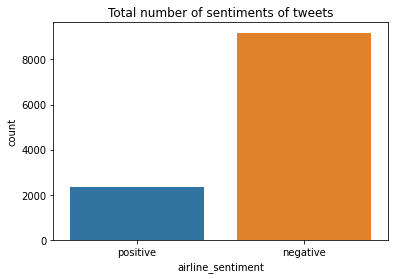

In [272]:
ax = sns.countplot(x = 'airline_sentiment', data = data)
ax.set_title(label = 'Total number of sentiments of tweets')
plt.show()

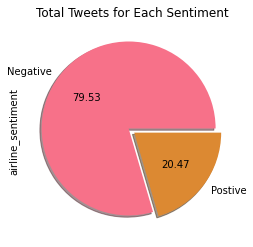

In [273]:
colors=sns.color_palette('husl',10)
pd.Series(data['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Postive'],explode=[0.05,0.03],shadow=True,autopct='%.2f',title="Total Tweets for Each Sentiment")
plt.show()

Wordcloud

In [268]:
positive=data[data['airline_sentiment']=='positive'].text
negative=data[data['airline_sentiment']=='negative'].text

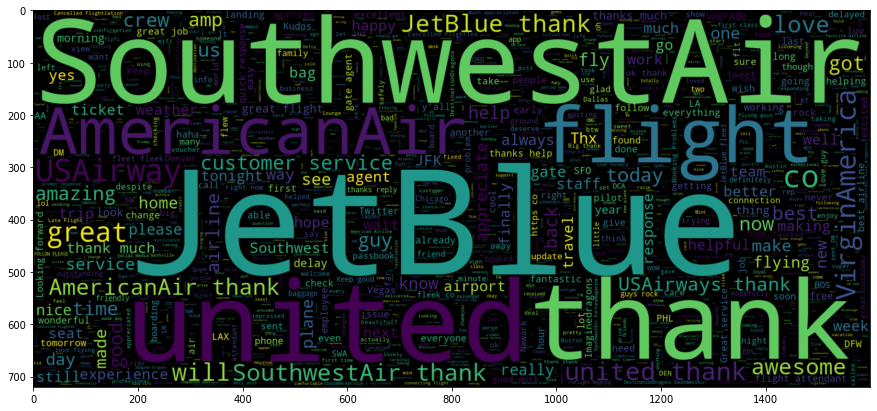

In [228]:
plt.figure(figsize=(15,10))
world_cloud_postive=WordCloud(min_font_size=3,max_words=2000,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

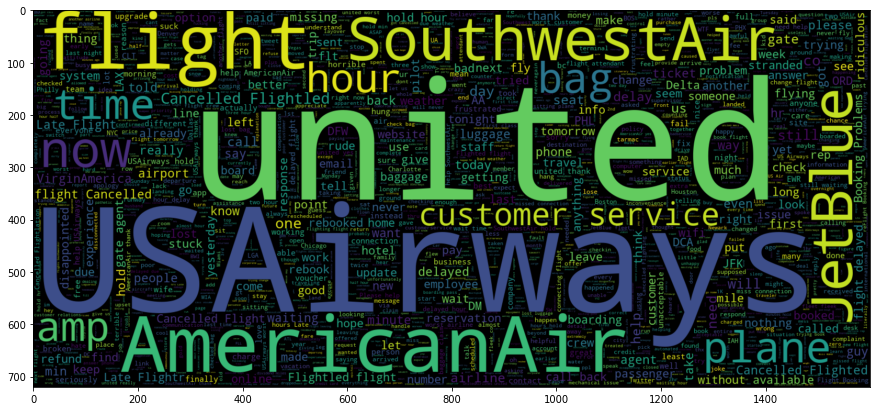

In [229]:
plt.figure(figsize=(15,10))
world_cloud_negative=WordCloud(min_font_size=3,max_words=2000,width=1600,height=720).generate("".join(negative))
plt.imshow(world_cloud_negative,interpolation='bilinear')
ax.grid(False)

preprocessing

In [ ]:
#labelling
def convert_Sentiment(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return 0
data.airline_sentiment = data.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [231]:
cnt = Counter()
for text in data["text"].values:
    for word in text.split():
        cnt[word] += 1

In [232]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# Remove doublespace
def remove_doublespace(text):       
  return  re.sub(' +',' ',text)

# Remove punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', PUNCT_TO_REMOVE))

# Remove Frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
    
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Remove rare words
n_rare_words = 20
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

# Lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [233]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF" 
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)




In [234]:
data['final_text'] = data['text'].apply(lambda x : remove_username(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_url(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_emoji(x))
data['final_text'] = data['final_text'].apply(lambda x : decontraction(x))
data['final_text'] = data['final_text'].apply(lambda x : seperate_alphanumeric(x))
data['final_text'] = data['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
data['final_text'] = data['final_text'].apply(lambda x : char(x))
data['final_text'] = data['final_text'].apply(lambda x : x.lower())
data['final_text'] = data['final_text'].apply(lambda x : remove_doublespace(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_stopwords(x))
data['final_text'] = data['final_text'].apply(lambda x: remove_freqwords(x))
data['final_text'] = data['final_text'].apply(lambda x: remove_rarewords(x))
data['final_text'] = data['final_text'].apply(lambda x: lemmatize_words(x))


In [236]:
X = data['final_text']
Y = data['airline_sentiment']

In [237]:
# tf-idf and imbalance handling
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,Y)

In [238]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=50)

Random Forest

In [239]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,Y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,Y_test)

0.9438997821350763

SVM

In [240]:
svm = SVC()
svm.fit(X_train,Y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,Y_test)

0.9558823529411765

Naive Bayes

In [242]:
nb = MultinomialNB()
nb.fit(X_train,Y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,Y_test)

0.9142156862745098

Decision Tree Classifier

In [243]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,Y_train)
tree_classifier_pred=tree_classifier.predict(X_test)
accuracy_score(tree_classifier_pred,Y_test)

0.9084967320261438

Emotion Analysis 

In [244]:
! pip install nrclex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [245]:
from nrclex import NRCLex

In [246]:
df_list = data['text'].values.tolist()
lis = []   
for i in range(0,len(df_list)) :
  txt = df_list[i] 
  Tv = NRCLex(txt)
  Tv = Tv.affect_frequencies
  Keymax = max(Tv, key= lambda x: Tv[x])
  lis.append(Keymax)   
data['Emotion'] = lis
data.head() 

,airline_sentiment,text,final_text,Emotion
0,1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky,fear
1,0,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,anger
2,0,@VirginAmerica and it's a really big bad thing...,really big bad thing,fear
3,0,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay seat play really bad thing...,fear
4,1,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx ear worm go away,anticipation


In [247]:
data['Emotion'].value_counts()

fear            3474
trust           3263
positive        2343
negative        1127
anticipation     606
anger            487
surprise         204
sadness           32
disgust            4
joy                1
Name: Emotion, dtype: int64

In [248]:
data.drop(data[(data['Emotion'] == 'joy')].index, inplace=True)
data.drop(data[(data['Emotion'] == 'disgust')].index, inplace=True)
data.drop(data[(data['Emotion'] == 'sadness')].index, inplace=True)

In [249]:
P = data['final_text']
Z = data['Emotion']
X_final =  tfid.fit_transform(P)
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,Z)


In [250]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=50)

Random Forest

In [252]:
random_forest_classifier = RandomForestClassifier(n_estimators=1000,  criterion='entropy', max_depth=10, min_samples_split=2)
random_forest_classifier.fit(x_sm,y_sm)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,Y_test)

0.7436266447368421

SVM

In [253]:
svm = SVC(C=3.0, kernel='rbf',gamma = 0.1)
svm.fit(x_sm,y_sm)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,Y_test)

0.9039884868421053

Airlines and their record

In [254]:
def tag(x):
    tags = []
    for i in x:
        tag = re.findall(r"@(\w+)", i)
        tags.append(tag)
    return tags 

In [255]:
data["text_lower"] = data["text"].str.lower()
HT_Negative = tag(data["text_lower"][data['airline_sentiment'] == 0])
HT_Positive = tag(data["text_lower"][data['airline_sentiment'] == 1])

# unnesting the list
HT_Positive = sum(HT_Positive,[])
HT_Negative = sum(HT_Negative,[]) 

HT_Negative = [x for x in HT_Negative if not (x.isdigit())]
HT_Positive = [x for x in HT_Positive if not (x.isdigit())]


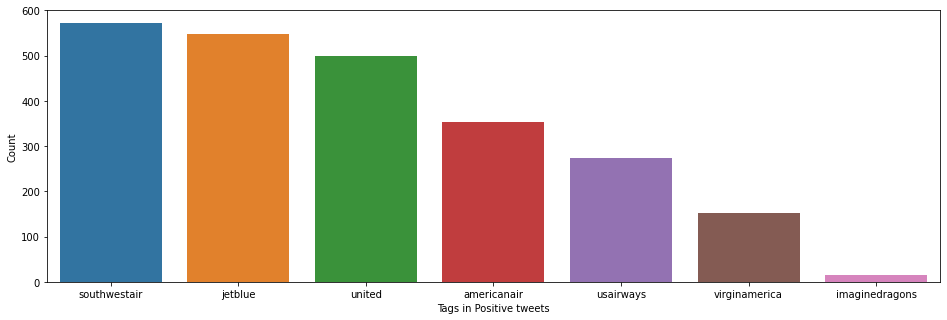

In [256]:
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Tag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 7) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Tag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Tags in Positive tweets') 
plt.show()

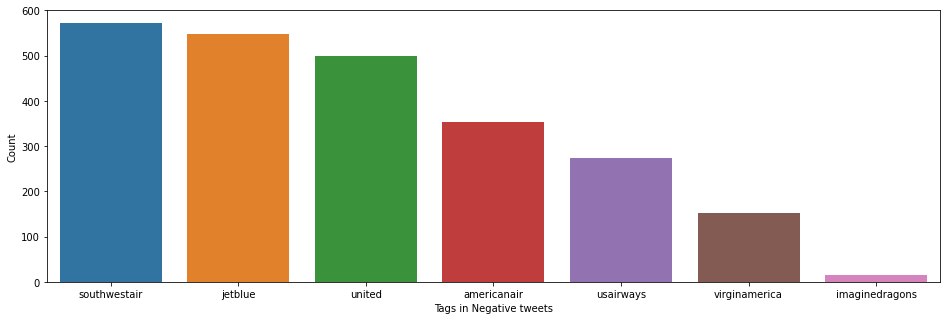

In [257]:
a = nltk.FreqDist(HT_Negative)
d1 = pd.DataFrame({'Tag': list(a.keys()),'Count': list(a.values())})
d1 = d1.nlargest(columns="Count", n = 7) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Tag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Tags in Negative tweets') 
plt.show()

United Air

In [258]:
val1 = d['Count'].values[d['Tag']=='united']
val2 = d1['Count'].values[d1['Tag']=='united']
val1.tolist()
val2.tolist()
d_tot = d['Count'].sum()
d1_tot = d1['Count'].sum()
Positivity_Score = val1[0]/d_tot
print("Airlines share of Positive Sentiments:", Positivity_Score)
Negativity_Score = val2[0]/d1_tot
print("Airlines share of Negative Sentiments:", Negativity_Score)

Airlines share of Positive Sentiments: 0.2070393374741201
Airlines share of Negative Sentiments: 0.2821023919429291


US Airways

In [259]:
val1 = d['Count'].values[d['Tag']=='usairways']
val2 = d1['Count'].values[d1['Tag']=='usairways']
val1.tolist()
val2.tolist()
d_tot = d['Count'].sum()
d1_tot = d1['Count'].sum()
Positivity_Score = val1[0]/d_tot
print("Airlines share of Positive Sentiments:", Positivity_Score)
Negativity_Score = val2[0]/d1_tot
print("Airlines share of Negative Sentiments:", Negativity_Score)

Airlines share of Positive Sentiments: 0.1134575569358178
Airlines share of Negative Sentiments: 0.24328577423415862


American Air

In [260]:
val1 = d['Count'].values[d['Tag']=='americanair']
val2 = d1['Count'].values[d1['Tag']=='americanair']
val1.tolist()
val2.tolist()
d_tot = d['Count'].sum()
d1_tot = d1['Count'].sum()
Positivity_Score = val1[0]/d_tot
print("Airlines share of Positive Sentiments:", Positivity_Score)
Negativity_Score = val2[0]/d1_tot
print("Airlines share of Negative Sentiments:", Negativity_Score)

Airlines share of Positive Sentiments: 0.14616977225672878
Airlines share of Negative Sentiments: 0.22031053294167016


Southwest Air

In [261]:
val1 = d['Count'].values[d['Tag']=='southwestair']
val2 = d1['Count'].values[d1['Tag']=='southwestair']
val1.tolist()
val2.tolist()
d_tot = d['Count'].sum()
d1_tot = d1['Count'].sum()
Positivity_Score = val1[0]/d_tot
print("Airlines share of Positive Sentiments:", Positivity_Score)
Negativity_Score = val2[0]/d1_tot
print("Airlines share of Negative Sentiments:", Negativity_Score)

Airlines share of Positive Sentiments: 0.23685300207039336
Airlines share of Negative Sentiments: 0.1270457406630298


JetBlue

In [262]:
val1 = d['Count'].values[d['Tag']=='jetblue']
val2 = d1['Count'].values[d1['Tag']=='jetblue']
val1.tolist()
val2.tolist()
d_tot = d['Count'].sum()
d1_tot = d1['Count'].sum()
Positivity_Score = val1[0]/d_tot
print("Airlines share of Positive Sentiments:", Positivity_Score)
Negativity_Score = val2[0]/d1_tot
print("Airlines share of Negative Sentiments:", Negativity_Score)

Airlines share of Positive Sentiments: 0.22650103519668738
Airlines share of Negative Sentiments: 0.10113302559798573


Virgin America

In [263]:
val1 = d['Count'].values[d['Tag']=='virginamerica']
val2 = d1['Count'].values[d1['Tag']=='virginamerica']
val1.tolist()
val2.tolist()
d_tot = d['Count'].sum()
d1_tot = d1['Count'].sum()
Positivity_Score = val1[0]/d_tot
print("Airlines share of Positive Sentiments:", Positivity_Score)
Negativity_Score = val2[0]/d1_tot
print("Airlines share of Negative Sentiments:", Negativity_Score)

Airlines share of Positive Sentiments: 0.06335403726708075
Airlines share of Negative Sentiments: 0.02003776751993286
